# Week1_복습과제

# 1. titanic.csv 데이터 불러오기

변수 설명  
- Survived - 생존 여부 (0 = 사망, 1 = 생존)
- Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
- Sex - 성별
- Age - 나이
- SibSp - 함께 탑승한 자녀 / 배우자 의 수
- Parch - 함께 탑승한 부모님 / 아이들 의 수
- Ticket - 티켓 번호
- Fare - 탑승 요금
- Cabin - 수하물 번호
- Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

#### 아래 코드를 실행시키고 문제에 답하시오.
- 패키지는 모두 설치되어 있다고 가정하겠습니다.

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd
import numpy as np

## 1-1번) 
titanic.csv를 불러와 titanic에 저장하시오.

In [3]:
import pandas as pd
titanic = pd.read_csv("C:\\titanic.csv")

# 2. 데이터 구조 훑어보기

## 2-1번) 
titanic의 마지막 다섯개 행을 불러 자료를 대략적으로 확인하시오.

In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## 2-2번) 
 titanic 데이터에 대한 간략한 설명을 출력하시오.
 - 전체 행 수, 데이터 타입, non-null 값의 개수 포함

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2-3번) 
Dtype이 object인 "Embarked" 열을 선택하여, 그 특성 안에는 어떤 카테고리가 있고, 각 카테고리마다 얼마나 많은 구역이 있는지 출력하시오.
- value_counts() 사용하기
- 교재 p.82 참고

In [6]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 2-4번) 
titanic 자료의 숫자형 특성의 요약 정보를 출력하시오.
- count, mean, min 등 포함

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2-5번) 
titanic 자료의 숫자형 특성에 대한 히스토그램을 출력하시오.

#### 아래 코드를 실행시키고 문제에 답하시오.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

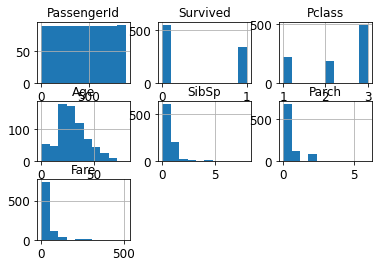

In [9]:
titanic.hist()

# 3. 데이터 시각화

In [10]:

%matplotlib inline 
import seaborn as sns

## 3-1번) 
strat_train_set 시각화하기

1) Pclass별 Fare의 막대그래프 그리기

* hint: `seaborn에 내장된 'barplot'이라는 함수` 이용하기

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

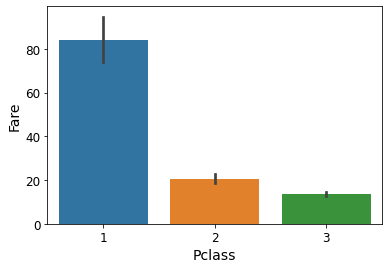

In [11]:
sns.barplot(x='Pclass',y='Fare',data=titanic)

2) Age와 Fare의 산점도 그리기

그림 저장: scatter_matrix_plot


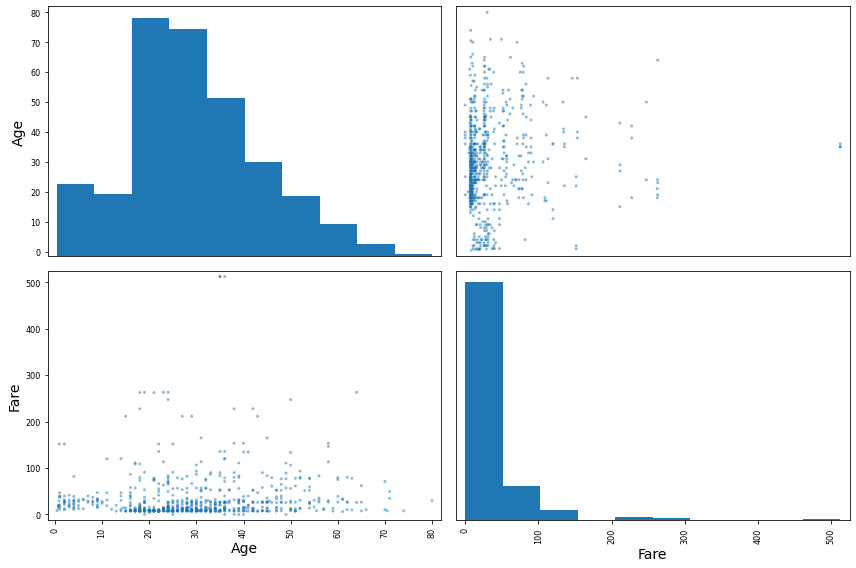

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Fare"]
scatter_matrix(titanic[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

3) Age와 SibSp의 산점도 그리기

그림 저장: scatter_matrix_plot


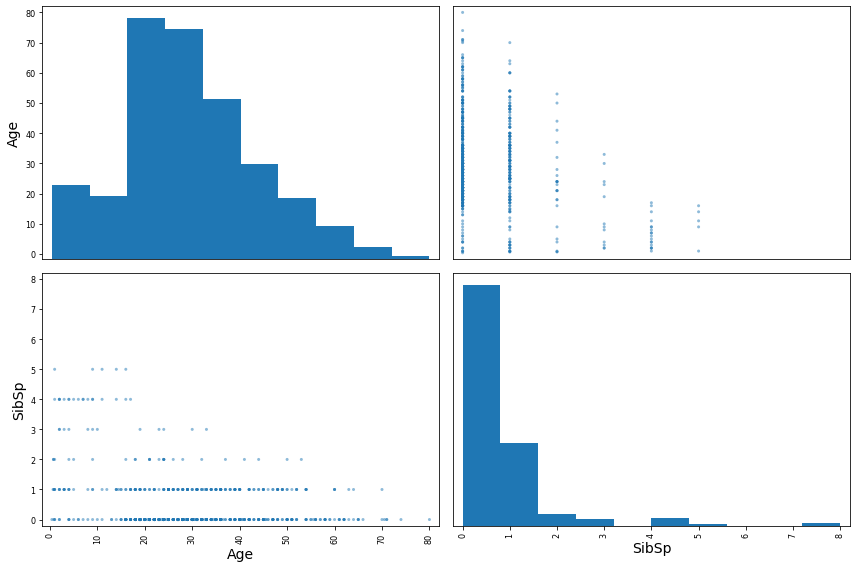

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "SibSp"]
scatter_matrix(titanic[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

## 3-2번) 
각 변수별 상관계수 구하기
* seaborn 패키지의 heatmap 그래프 이용 

<AxesSubplot:>

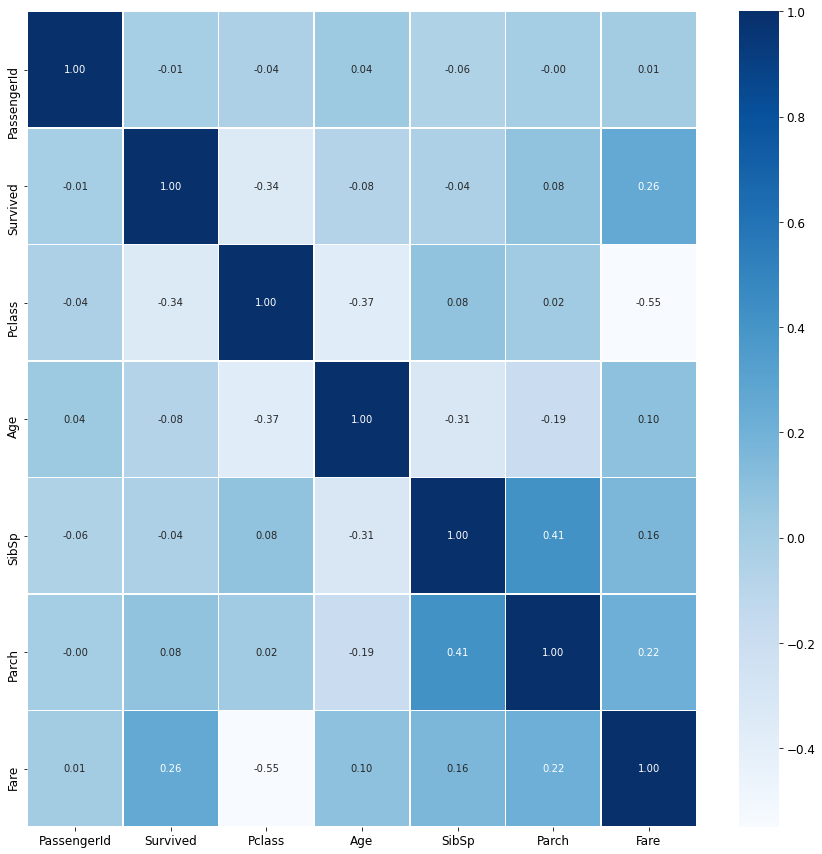

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data = titanic.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 4. 데이터 정제 작업
* 누락값 처리

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4-1번) 
Age 변수의 누락값을 중앙값으로 채우기

In [16]:
median = titanic["Age"].median()
titanic["Age"].fillna(median, inplace=True) 

## 4-2번) 
* Name, Ticket, Cabin 특성 제거하기


In [17]:
titanic.drop(['Name','Ticket','Cabin'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


* Na값을 가지고 있는 행 지우기

In [18]:
titanic.dropna(how='any')  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## 4-3번) 
범주형 변수를 one-hot encoding 하기

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* head() 함수로 one-hot encoding 결과 확인하기

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4-4번)
현재 titanic에서 범주형 변수의 성격을 지니고 있는 변수의 이름은?

A. Name, Sex, Ticket, Cabin, Emarked, Fare_cat

## 4-5번) 
범주형 변수를 one-hot encoding 하기  
**sex 변수의 경우 이진분류이므로 drop_first=True 사용*

** hint: pandas의 'get_dummies' 함수 이용

In [21]:
pd.get_dummies(['Name', 'Ticket', 'Cabin', 'Emarked', 'Fare_cat'])

,Cabin,Emarked,Fare_cat,Name,Ticket
0,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [22]:
pd.get_dummies('Sex', drop_first=True)

""
0
1
2


# 5. 무작위 샘플링으로 테스트 세트 만들기


## 5-1번) 
무작위 샘플링 방식 중 sklearn(사이킷런)의 내장함수 train_test_split()을 이용하여 train set과 test set을 샘플링하시오. 

(단, test set의 size는 전체 데이터셋의 25%로 한다.)
- 각 set의 이름은 X_train, X_test, y_train, y_test로 한다. 
- random_state = 42

In [23]:
#아래의 코드를 돌리고 실행
X_titanic = titanic.drop('Survived', axis = 1)
y_titanic = titanic['Survived']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, test_size=0.25, random_state = 42)

## 5-2번) 
만들어진 X_train과 X_test의 길이를 출력하여 확인하시오.

In [25]:
len(X_train),len(y_test)

(668, 223)

# 6. 계층적 샘플링으로 테스트 세트 만들기

#### 아래 코드를 실행시키고 문제에 답하시오.

In [26]:
titanic["Fare_cat"]=pd.cut(titanic["Fare"],
                            bins=[-0.1,8,14.45,31,np.inf],
                            labels=[1,2,3,4])

## 6-1번) 
sklearn(사이킷런)의 StratifiedShuffleSplit을 이용하여 train set과 test set을 샘플링하시오. 단, test set의 size는 전체 데이터셋의 20%로 한다. 
- 각 set의 이름은 strat_train_set, strat_test_set으로 한다. 

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic, titanic["Fare_cat"]):
    strat_train_set = titanic.loc[train_index]
    strat_test_set = titanic.loc[test_index]

## 6-2번) 
start_test_set에서 Fare_cat의 카테고리별 비율을 출력하여 확인하시오.

In [28]:
strat_test_set["Fare_cat"].value_counts() / len(strat_test_set)

1    0.268156
3    0.256983
4    0.251397
2    0.223464
Name: Fare_cat, dtype: float64

## 6-3번) 
titanic 전체 데이터에서 Fare_cat 특성을 삭제하여 데이터를 원래 상태로 되돌려 놓으시오.
- drop()함수를 사용하시오

In [29]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Fare_cat", axis=1, inplace=True)

# 7. 모델 평가  

## 7-1번)
교차 검증(cross_val_score)을 사용하여 모델 평가하고, RMSE의 평균과 표준편차를 출력하시오.

- `X_train, y_train`을 사용할 것
- 모델: DecisionTreeClassifier
- 예측 성능 지표: accuracy
- fold: 5

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [32]:
titanic_predictions = tree_clf.predict(titanic)
tree_mse = mean_squared_error(X_train, y_train)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

NameError: name 'tree_clf' is not defined

# 8. joblib

## 8-1번)
joblib으로 모델 저장하기(저장명: my_model)

In [33]:
import joblib
joblib.dump(model, "my_model.pkl") 
my_model_loaded = joblib.load("my_model.pkl") 

NameError: name 'model' is not defined

# 9. 모델 튜닝

## 9-1번)
그리드 탐색을 진행하고 최적의 파라미터 출력하기  

- `X_train, y_train`을 사용할 것
- 사용할 모델, cv, 예측 성능 지표는 1번과 동일

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
#해당 코드를 돌리고 실행
params = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

In [37]:
forest_clf = DecisionTreeClassifier
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

NameError: name 'param_grid' is not defined